# **Unique Balance data (Single coin)**

In [ ]:
from google.oauth2 import service_account
from google.cloud import bigquery
from google.cloud.exceptions import NotFound
import pandas as pd
from google.cloud import storage
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
project_id = "looker-assignment-113356033"
dataset_id = "final_project_dataset"

In [ ]:
crendentials = service_account.Credentials.from_service_account_file(r"C:\nccu\workspace\dataModel_finalProjrct\looker-assignment-113356033-4959799503ac.json")

In [ ]:
bigquery_client = bigquery.Client(project=project_id, credentials=crendentials)
storage_client = storage.Client(credentials=crendentials, project=project_id)

[INFO] 檔案成功載入，資料形狀: (7520148, 5)
[INFO] 每個月份的唯一地址數量：
   year_month  unique_address_count
0     2020-07                   402
1     2020-08                  1640
2     2020-09                   336
3     2020-10                   117
4     2020-11                    57
5     2020-12                    22
6     2021-01                  6591
7     2021-02                 10451
8     2021-03                 18665
9     2021-04                145804
10    2021-05                566777
11    2021-06                262735
12    2021-07                273482
13    2021-08                162622
14    2021-09                174838
15    2021-10                757481
16    2021-11                488938
17    2021-12                294900
18    2022-01                175139
19    2022-02                160790
20    2022-03                236732
21    2022-04                128989
22    2022-05                119096
23    2022-06                 84203
24    2022-07                117253
25    2022-

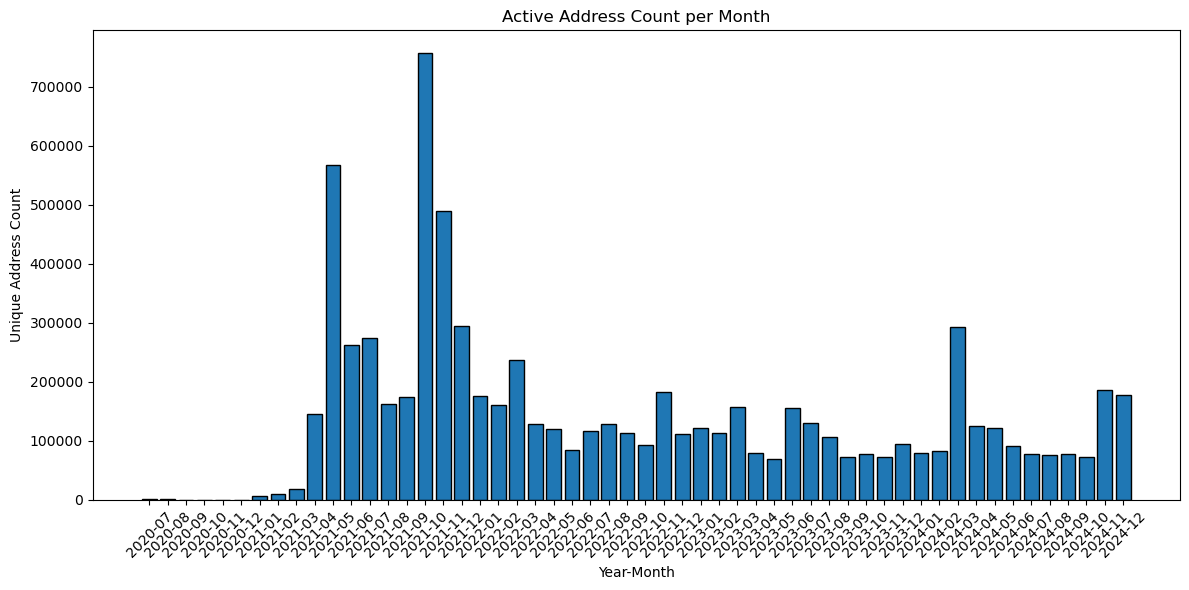

In [ ]:
query = """
    SELECT 
        year_month, 
        Address 
    FROM `looker-assignment-113356033.final_project_dataset.Token_balances`
"""

try:
    df = bigquery_client.query(query).to_dataframe()
    print(f"[INFO] 数据成功载入，形状: {df.shape}")

    if 'year_month' in df.columns and 'Address' in df.columns:
        
        address_count_per_month = df.groupby('year_month')['Address'].nunique().reset_index()
        address_count_per_month.columns = ['year_month', 'unique_address_count']

        print("[INFO] 每个月的唯一地址数量：")
        print(address_count_per_month)

        plt.figure(figsize=(12, 6))
        plt.bar(
            address_count_per_month['year_month'], 
            address_count_per_month['unique_address_count'], 
            edgecolor='black'
        )
        plt.title('Active Address Count per Month')
        plt.xlabel('Year-Month')
        plt.ylabel('Unique Address Count')
        plt.xticks(rotation=45)
        plt.tight_layout()

        output_image_path = 'active_address_count_per_month.png'
        plt.savefig(output_image_path)
        print(f"[INFO] 图表已保存到 {output_image_path}")

        plt.show()

    else:
        print("[ERROR] 缺少 'year_month' 或 'Address' 字段。")

except Exception as e:
    print(f"[ERROR] 发生错误: {e}")

# **Unique Balance data (Combined coin)**

[INFO] 檔案 Bonk_token_balances.csv 成功載入，資料形狀: (47745, 5)
[INFO] 檔案 Floki_token_balances.csv 成功載入，資料形狀: (335829, 5)
[INFO] 檔案 Mog_token_balances.csv 成功載入，資料形狀: (182594, 5)
[INFO] 檔案 Pepe_token_balances.csv 成功載入，資料形狀: (1475375, 5)
[INFO] 檔案 Shib_token_balances.csv 成功載入，資料形狀: (7520148, 5)
[INFO] 圖表已保存到 transform_data/balance\active_address_count_five_tokens.png


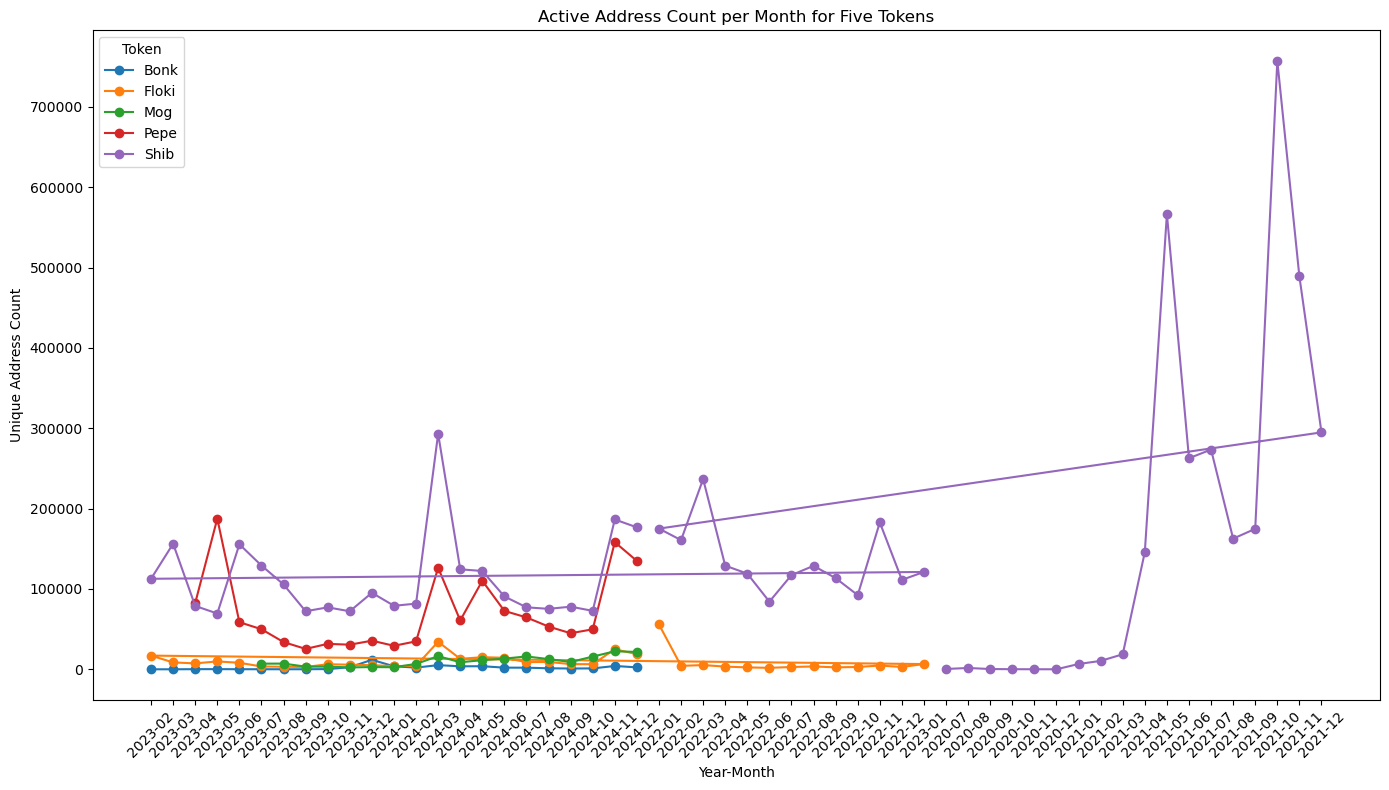

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load two specific datasets
Bonk_query = """
SELECT
    *
FROM `looker-assignment-113356033.final_project_dataset.Bonk_token_balances`
"""

Bonk_balances_data = bigquery_client.query(Bonk_query).to_dataframe()

FLOKI_query = """
SELECT
    *
FROM `looker-assignment-113356033.final_project_dataset.FLOKI_token_balances`
"""

FLOKI_balances_data = bigquery_client.query(FLOKI_query).to_dataframe()

Mog_query = """
SELECT
    *
FROM `looker-assignment-113356033.final_project_dataset.Mog_token_balances`
"""

Mog_balances_data = bigquery_client.query(Mog_query).to_dataframe()

Pepe_query = """
SELECT
    *
FROM `looker-assignment-113356033.final_project_dataset.Pepe_token_balances`
"""

Pepe_balances_data = bigquery_client.query(Pepe_query).to_dataframe()

Shib_query = """
SELECT
    *
FROM `looker-assignment-113356033.final_project_dataset.Shib_token_balances`
"""

Shib_balances_data = bigquery_client.query(Shib_query).to_dataframe()

file_names = [
    Bonk_balances_data,
    FLOKI_balances_data,
    Mog_balances_data,
    Pepe_balances_data,
    Shib_balances_data
]

try:
    plt.figure(figsize=(14, 8))  # 設定圖表大小

    # 逐個處理每個 DataFrame
    for df in file_names:
        # 檢查必要欄位
        if 'year_month' in df.columns and 'Address' in df.columns:
            # 計算每個 year_month 中的唯一地址數量
            address_count_per_month = df.groupby('year_month')['Address'].nunique().reset_index()
            address_count_per_month.columns = ['year_month', 'unique_address_count']

            # 提取代幣名稱（文件名的第一部分）
            token_name = df.columns[0].split('_')[0]

            # 繪製折線圖
            plt.plot(
                address_count_per_month['year_month'],
                address_count_per_month['unique_address_count'],
                marker='o',
                label=token_name
            )
        else:
            print(f"[WARNING] 欄位缺失，已跳過。")

    # 圖表標題和標籤
    plt.title('Active Address Count per Month for Five Tokens')
    plt.xlabel('Year-Month')
    plt.ylabel('Unique Address Count')
    plt.xticks(rotation=45)
    plt.legend(title='Token')  # 添加圖例
    plt.tight_layout()

    # 保存圖表到文件
    output_image_path = 'active_address_count_five_tokens.png'
    plt.savefig(output_image_path)
    print(f"[INFO] 圖表已保存到 {output_image_path}")

    # 顯示圖表
    plt.show()

except Exception as e:
    print(f"[ERROR] 發生錯誤: {e}")

# **News Address (Single coin)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

# ============================
# 1. Data Loading
# ============================
def load_transfers_data(directory_path, file_name):
    """
    Load and combine multiple token balance CSV files into a single DataFrame.

    Args:
        directory_path (str): The path to the directory containing the CSV files.
        file_name (str): File name pattern to match CSV files.

    Returns:
        pd.DataFrame: Combined DataFrame containing data from all matched CSV files.
    """
    all_files = glob(os.path.join(directory_path, file_name))
    all_data = []  # List to hold individual DataFrames

    if not all_files:
        print("[ERROR] No matching files found in the directory.")
        return pd.DataFrame()

    print(f"[INFO] Found {len(all_files)} files. Loading...")

    for file in sorted(all_files):
        try:
            df = pd.read_csv(file)
            all_data.append(df)
            print(f"[INFO] Loaded {file} with {df.shape[0]} rows and {df.shape[1]} columns.")
        except Exception as e:
            print(f"[ERROR] Failed to load {file}: {e}")

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        print(f"[INFO] Combined DataFrame shape: {combined_df.shape}")
        return combined_df
    else:
        print("[ERROR] No valid data loaded from files.")
        return pd.DataFrame()

# ============================
# 2. Data Transformation
# ============================
def calculate_new_addresses(balance_df):
    """
    Calculate the number of increased new addresses in each year_month.

    Args:
        balance_df (pd.DataFrame): DataFrame with 'year_month', 'Address', and 'Balance'.

    Returns:
        pd.DataFrame: DataFrame with 'year_month' and 'New_Addresses' columns.
    """
    # Ensure required columns exist
    required_columns = {'year_month', 'Address', 'Balance'}
    if not required_columns.issubset(balance_df.columns):
        raise ValueError(f"[ERROR] DataFrame must contain the following columns: {required_columns}")

    # Ensure 'year_month' is sorted chronologically
    balance_df['year_month'] = pd.to_datetime(balance_df['year_month'], format='%Y-%m')
    balance_df = balance_df.sort_values(by='year_month').reset_index(drop=True)

    # Group by year_month and get unique addresses
    grouped = balance_df.groupby('year_month')['Address'].unique()

    # Calculate new addresses month-over-month
    previous_addresses = set()
    new_addresses_data = []

    for period, addresses in grouped.items():
        current_addresses = set(addresses)
        new_addresses = current_addresses - previous_addresses
        new_addresses_data.append({
            'year_month': period.strftime('%Y-%m'),
            'New_Addresses': len(new_addresses)
        })
        previous_addresses.update(current_addresses)

    new_addresses_df = pd.DataFrame(new_addresses_data)
    print(f"[INFO] Calculated new addresses for {len(new_addresses_df)} periods.")
    return new_addresses_df

# ============================
# 3. Plotting
# ============================
def plot_new_addresses(new_addresses_df, token_name):
    """
    Plot the trend of new addresses over time.

    Args:
        new_addresses_df (pd.DataFrame): DataFrame with 'year_month' and 'New_Addresses'.
        token_name (str): Name of the token for labeling purposes.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(new_addresses_df['year_month'], new_addresses_df['New_Addresses'], marker='o', linestyle='-', color='b')
    plt.title(f'New Addresses Over Time ({token_name})')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of New Addresses')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_new_and_cumulative_addresses(new_addresses_df, token_name):
    """
    Plot the trend of new and cumulative addresses over time using dual Y-axes.

    Args:
        new_addresses_df (pd.DataFrame): DataFrame with 'year_month' and 'New_Addresses'.
        token_name (str): Name of the token for labeling purposes.
    """
    # Ensure the cumulative column exists
    new_addresses_df['Cumulative_New_Addresses'] = new_addresses_df['New_Addresses'].cumsum()

    # Create a dual-axis plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # 📈 Left Y-Axis: Monthly New Addresses
    ax1.set_xlabel('Time (year_month)')
    ax1.set_ylabel('New Addresses', color='tab:blue')
    ax1.plot(new_addresses_df['year_month'], new_addresses_df['New_Addresses'],
             marker='o', linestyle='-', color='tab:blue', label='Monthly New Addresses')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_xticks(range(len(new_addresses_df['year_month'])))
    ax1.set_xticklabels(new_addresses_df['year_month'], rotation=45, ha='right')

    # 📉 Right Y-Axis: Cumulative Addresses
    ax2 = ax1.twinx()
    ax2.set_ylabel('Cumulative Addresses', color='tab:orange')
    ax2.plot(new_addresses_df['year_month'], new_addresses_df['Cumulative_New_Addresses'],
             marker='s', linestyle='--', color='tab:orange', label='Cumulative Addresses')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # 📊 Title and Legend
    fig.suptitle(f'Monthly New Addresses and Cumulative Addresses ({token_name})')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    # Grid and display
    ax1.grid(True, linestyle='--', alpha=0.5)
    save_plot(f'New and Cumulative {token_name}', 'plot')
    plt.show()

# ============================
# 4. Save Plots
# ============================
def save_plot(file_name, plot_type, output_dir='plots'):
    """
    Save the current plot to a specified directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    plot_file_name = f"{file_name}_{plot_type}.png"
    plot_path = os.path.join(output_dir, plot_file_name)
    plt.savefig(plot_path, bbox_inches='tight')
    print(f"[INFO] Plot saved: {plot_path}")
    plt.close()

# ============================
# . Main Function
# ============================
def main():
    """
    Main function to process multiple token balance files and generate plots.
    """
    # Define file paths and patterns
    directory_path = 'transform_data'
    file_names = [
        'Floki_token_balances.csv',
        'Bonk_token_balances.csv',
        'Mog_token_balances.csv',
        'Shib_token_balances.csv',
        'Pepe_token_balances.csv'
    ]
    token_names = ['FLOKI', 'BONK', 'MOG', 'SHIB', 'PEPE']

    for file_name, token_name in zip(file_names, token_names):
        file_path = os.path.join(directory_path, file_name)

        # Load and combine data
        balance_df = load_transfers_data(directory_path, file_name)
        if balance_df.empty:
            continue

        # Step 1: Calculate new addresses
        monthly_new_addresses = calculate_new_addresses(balance_df)

        # Step 2: Plot results
        plot_new_and_cumulative_addresses(monthly_new_addresses, token_name)

# ============================
# 5. Entry Point
# ============================
if __name__ == '__main__':
    main()


[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Floki_token_balances.csv with 335829 rows and 5 columns.
[INFO] Combined DataFrame shape: (335829, 5)
[INFO] Calculated new addresses for 36 periods.
[INFO] Plot saved: plots\New and Cumulative FLOKI_plot.png
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Bonk_token_balances.csv with 47745 rows and 5 columns.
[INFO] Combined DataFrame shape: (47745, 5)
[INFO] Calculated new addresses for 23 periods.
[INFO] Plot saved: plots\New and Cumulative BONK_plot.png
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Mog_token_balances.csv with 182594 rows and 5 columns.
[INFO] Combined DataFrame shape: (182594, 5)
[INFO] Calculated new addresses for 18 periods.
[INFO] Plot saved: plots\New and Cumulative MOG_plot.png
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Shib_token_balances.csv with 7520148 rows and 5 columns.
[INFO] Combined DataFrame shape: (7520148, 5)
[INFO] Calculated new addresse

# **New Addresses (Combined coin)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

# ============================
# 1. Load Transfers Data
# ============================
def load_transfers_data(file_paths):
    """
    Load and combine multiple token balance CSV files into a single DataFrame.

    Args:
        file_paths (list): List of file paths containing CSV files.

    Returns:
        pd.DataFrame: Combined DataFrame containing data from all matched CSV files.
    """
    all_data = []  # List to hold individual DataFrames

    if not file_paths:
        print("[ERROR] No matching files found.")
        return pd.DataFrame()

    print(f"[INFO] Found {len(file_paths)} files. Loading...")

    for file in sorted(file_paths):
        try:
            df = pd.read_csv(file)
            all_data.append(df)
            print(f"[INFO] Loaded {file} with {df.shape[0]} rows and {df.shape[1]} columns.")
        except Exception as e:
            print(f"[ERROR] Failed to load {file}: {e}")

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        print(f"[INFO] Combined DataFrame shape: {combined_df.shape}")
        return combined_df
    else:
        print("[ERROR] No valid data loaded from files.")
        return pd.DataFrame()

# ============================
# 2. Calculate New Addresses
# ============================
def calculate_new_addresses(balance_df):
    """
    Calculate the number of increased new addresses in each year_month.

    Args:
        balance_df (pd.DataFrame): DataFrame with 'year_month', 'Address', and 'Balance'.

    Returns:
        pd.DataFrame: DataFrame with 'year_month' and 'New_Addresses' columns.
    """
    # Ensure required columns exist
    required_columns = {'year_month', 'Address', 'Balance'}
    if not required_columns.issubset(balance_df.columns):
        raise ValueError(f"[ERROR] DataFrame must contain the following columns: {required_columns}")

    # Ensure 'year_month' is sorted chronologically
    balance_df['year_month'] = pd.to_datetime(balance_df['year_month'], format='%Y-%m')
    balance_df = balance_df.sort_values(by='year_month').reset_index(drop=True)

    # Group by year_month and get unique addresses
    grouped = balance_df.groupby('year_month')['Address'].unique()

    # Calculate new addresses month-over-month
    previous_addresses = set()
    new_addresses_data = []

    for period, addresses in grouped.items():
        current_addresses = set(addresses)
        new_addresses = current_addresses - previous_addresses
        new_addresses_data.append({
            'year_month': period.strftime('%Y-%m'),
            'New_Addresses': len(new_addresses)
        })
        previous_addresses.update(current_addresses)

    new_addresses_df = pd.DataFrame(new_addresses_data)
    print(f"[INFO] Calculated new addresses for {len(new_addresses_df)} periods.")
    return new_addresses_df

# ============================
# 3. Align Data with a Common X-Axis
# ============================
def align_data_with_xlabels(df, x_labels):
    """
    Align DataFrame with predefined x_labels.

    Args:
        df (pd.DataFrame): DataFrame with 'year_month' and 'New_Addresses'.
        x_labels (list): Predefined list of x_labels (year_month).

    Returns:
        pd.DataFrame: Aligned DataFrame with x_labels as the index.
    """
    df = df.set_index('year_month')
    df = df.reindex(x_labels, fill_value=0)  # Fill missing x_labels with 0
    return df

# ============================
# 4. Combined Plot
# ============================
def plot_combined_new_addresses(daily_flows):
    """
    Plot new addresses trends for multiple tokens on a single plot.

    Args:
        daily_flows (dict): Dictionary of token names and their corresponding DataFrame.
    """
    plt.figure(figsize=(14, 8))

    # Create a unified x-axis (year_month)
    all_year_months = pd.concat([df['year_month'] for df in daily_flows.values()])
    all_year_months = pd.to_datetime(all_year_months).dt.strftime('%Y-%m').unique()
    all_year_months = sorted(all_year_months)

    x_range = range(len(all_year_months))

    # Plot each token's data
    for token, df in daily_flows.items():
        aligned_df = align_data_with_xlabels(df, all_year_months)
        plt.plot(x_range, aligned_df['New_Addresses'], marker='o', linestyle='-', label=f'{token} New Addresses')

    plt.title('Combined Monthly New Addresses Across Tokens')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of New Addresses')
    plt.legend()
    plt.xticks(x_range, all_year_months, rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_plot('New Address', 'Combined_token (without Shib)')
    plt.show()

# ============================
# 4. Save Plots
# ============================
def save_plot(file_name, plot_type, output_dir='plots'):
    """
    Save the current plot to a specified directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    plot_file_name = f"{file_name}_{plot_type}.png"
    plot_path = os.path.join(output_dir, plot_file_name)
    plt.savefig(plot_path, bbox_inches='tight')
    print(f"[INFO] Plot saved: {plot_path}")
    plt.close()

# ============================
# 5. Main Function
# ============================
def main():
    """
    Main function to process multiple token balance files and generate plots.
    """
    # Assuming token balance data are already loaded into these variables
    daily_flows = {
        'FLOKI': FLOKI_balances_data,
        'BONK': Bonk_balances_data,
        'MOG': Mog_balances_data,
        'PEPE': Pepe_balances_data
    }

    for token_name, df in daily_flows.items():
        if df.empty:
            print(f"[WARNING] No data available for {token_name}. Skipping...")
            continue

        # Calculate new addresses
        monthly_new_addresses = calculate_new_addresses(df)
        daily_flows[token_name] = monthly_new_addresses

    # Plot combined results
    plot_combined_new_addresses(daily_flows)

# ============================
# 6. Entry Point
# ============================
if __name__ == '__main__':
    main()

[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Floki_token_balances.csv with 335829 rows and 5 columns.
[INFO] Combined DataFrame shape: (335829, 5)
[INFO] Calculated new addresses for 36 periods.
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Bonk_token_balances.csv with 47745 rows and 5 columns.
[INFO] Combined DataFrame shape: (47745, 5)
[INFO] Calculated new addresses for 23 periods.
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Mog_token_balances.csv with 182594 rows and 5 columns.
[INFO] Combined DataFrame shape: (182594, 5)
[INFO] Calculated new addresses for 18 periods.
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Pepe_token_balances.csv with 1475375 rows and 5 columns.
[INFO] Combined DataFrame shape: (1475375, 5)
[INFO] Calculated new addresses for 21 periods.
[INFO] Plot saved: plots\New Address_Combined_token (without Shib).png


# **Cumulative Addresses (Combined coin)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

# ============================
# 1. Load Transfers Data
# ============================
def load_transfers_data(file_name):
    """
    Load and combine multiple token balance CSV files into a single DataFrame.

    Args:
        file_name (str): File name pattern to match CSV files.

    Returns:
        pd.DataFrame: Combined DataFrame containing data from all matched CSV files.
    """
    all_files = glob(file_name)
    all_data = []  # List to hold individual DataFrames

    if not all_files:
        print("[ERROR] No matching files found in the directory.")
        return pd.DataFrame()

    print(f"[INFO] Found {len(all_files)} files. Loading...")

    for file in sorted(all_files):
        try:
            df = pd.read_csv(file)
            all_data.append(df)
            print(f"[INFO] Loaded {file} with {df.shape[0]} rows and {df.shape[1]} columns.")
        except Exception as e:
            print(f"[ERROR] Failed to load {file}: {e}")

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        print(f"[INFO] Combined DataFrame shape: {combined_df.shape}")
        return combined_df
    else:
        print("[ERROR] No valid data loaded from files.")
        return pd.DataFrame()

# ============================
# 2. Calculate Cumulative Addresses
# ============================
def calculate_cumulative_addresses(balance_df):
    """
    Calculate the cumulative number of unique addresses over time.

    Args:
        balance_df (pd.DataFrame): DataFrame with 'year_month', 'Address', and 'Balance'.

    Returns:
        pd.DataFrame: DataFrame with 'year_month' and 'Cumulative_Addresses' columns.
    """
    # Ensure required columns exist
    required_columns = {'year_month', 'Address', 'Balance'}
    if not required_columns.issubset(balance_df.columns):
        raise ValueError(f"[ERROR] DataFrame must contain the following columns: {required_columns}")

    # Ensure 'year_month' is sorted chronologically
    balance_df['year_month'] = pd.to_datetime(balance_df['year_month'], format='%Y-%m')
    balance_df = balance_df.sort_values(by='year_month').reset_index(drop=True)

    # Group by year_month and get unique addresses
    grouped = balance_df.groupby('year_month')['Address'].unique()

    cumulative_addresses = set()
    cumulative_data = []

    for period, addresses in grouped.items():
        cumulative_addresses.update(addresses)
        cumulative_data.append({
            'year_month': period.strftime('%Y-%m'),
            'Cumulative_Addresses': len(cumulative_addresses)
        })

    cumulative_df = pd.DataFrame(cumulative_data)
    print(f"[INFO] Calculated cumulative addresses for {len(cumulative_df)} periods.")
    return cumulative_df

# ============================
# 3. Align Data with a Common X-Axis
# ============================
def align_data_with_xlabels(df, x_labels):
    """
    Align DataFrame with predefined x_labels.

    Args:
        df (pd.DataFrame): DataFrame with 'year_month' and 'Cumulative_Addresses'.
        x_labels (list): Predefined list of x_labels (year_month).

    Returns:
        pd.DataFrame: Aligned DataFrame with x_labels as the index.
    """
    df = df.set_index('year_month')
    df = df.reindex(x_labels, fill_value=0)  # Fill missing x_labels with 0
    return df

# ============================
# 4. Combined Plot for Cumulative Addresses
# ============================
def plot_combined_cumulative_addresses(cumulative_flows):
    """
    Plot cumulative addresses trends for multiple tokens on a single plot.

    Args:
        cumulative_flows (dict): Dictionary of token names and their corresponding DataFrame.
    """
    plt.figure(figsize=(14, 8))

    # Create a unified x-axis (year_month)
    all_year_months = pd.concat([df['year_month'] for df in cumulative_flows.values()])
    all_year_months = pd.to_datetime(all_year_months).dt.strftime('%Y-%m').unique()
    all_year_months = sorted(all_year_months)

    x_range = range(len(all_year_months))

    # Plot each token's cumulative data
    for token, df in cumulative_flows.items():
        aligned_df = align_data_with_xlabels(df, all_year_months)
        plt.plot(x_range, aligned_df['Cumulative_Addresses'], marker='o', linestyle='-', label=f'{token} Cumulative Addresses')

    plt.title('Combined Monthly Cumulative Addresses Across Tokens')
    plt.xlabel('Year-Month')
    plt.ylabel('Cumulative Number of Addresses')
    plt.legend()
    plt.xticks(x_range, all_year_months, rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_plot('Cumulative address', 'Combined_token(without Shib)')
    plt.show()

# ============================
# 5. Save Plots
# ============================
def save_plot(file_name, plot_type, output_dir='plots'):
    """
    Save the current plot to a specified directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    plot_file_name = f"{file_name}_{plot_type}.png"
    plot_path = os.path.join(output_dir, plot_file_name)
    plt.savefig(plot_path, bbox_inches='tight')
    print(f"[INFO] Plot saved: {plot_path}")
    plt.close()

# ============================
# . Main Function
# ============================
def main():
    """
    Main function to process multiple token balance files and generate cumulative address plots.
    """
    file_names = [
        'FLOKI_balances_data',
        'Bonk_balances_data',
        'Mog_balances_data',
        'Pepe_balances_data',
    ]
    #token_names = ['FLOKI', 'BONK', 'MOG', 'SHIB', 'PEPE']
    token_names = ['FLOKI', 'BONK', 'MOG', 'PEPE']

    cumulative_flows = {}
    for file_name, token_name in zip(file_names, token_names):
        # Load and combine data
        balance_df = load_transfers_data(file_name)
        if balance_df.empty:
            continue

        # Calculate cumulative addresses
        cumulative_addresses = calculate_cumulative_addresses(balance_df)
        cumulative_flows[token_name] = cumulative_addresses

    # Plot combined results
    plot_combined_cumulative_addresses(cumulative_flows)

# ============================
# 6. Entry Point
# ============================
if __name__ == '__main__':
    main()

[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Floki_token_balances.csv with 335829 rows and 5 columns.
[INFO] Combined DataFrame shape: (335829, 5)
[INFO] Calculated cumulative addresses for 36 periods.
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Bonk_token_balances.csv with 47745 rows and 5 columns.
[INFO] Combined DataFrame shape: (47745, 5)
[INFO] Calculated cumulative addresses for 23 periods.
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Mog_token_balances.csv with 182594 rows and 5 columns.
[INFO] Combined DataFrame shape: (182594, 5)
[INFO] Calculated cumulative addresses for 18 periods.
[INFO] Found 1 files. Loading...
[INFO] Loaded transform_data\Pepe_token_balances.csv with 1475375 rows and 5 columns.
[INFO] Combined DataFrame shape: (1475375, 5)
[INFO] Calculated cumulative addresses for 21 periods.
[INFO] Plot saved: plots\Cumulative address_Combined_token(without Shib).png
